In [1]:
import pandas as pd
import numpy as np
import pyarrow

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import plotly.io as pio
pio.renderers.default = "vscode"

import mplfinance as mpf

# 1) Bronze

In [2]:
#df = pd.read_parquet("data/bronze/ibov_ohlcv.parquet")
df = pd.read_parquet(r"D:\Documentos\Data & AI\volatility-regime-lab\data\bronze\ibov_ohlcv.parquet")

df_mpf = df.copy()
df_mpf["Date"] = pd.to_datetime(df["Date"])
df_mpf = df_mpf.sort_values("Date").set_index("Date")

In [3]:
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,1993-04-27,24.500000,24.500000,25.400000,24.500000,24.799999,0
1,1993-04-28,24.299999,24.299999,24.600000,23.700001,24.500000,0
2,1993-04-29,23.700001,23.700001,24.799999,23.700001,24.299999,0
3,1993-04-30,24.100000,24.100000,24.200001,23.700001,23.700001,0
4,1993-05-03,24.100000,24.100000,24.400000,23.799999,24.100000,0
...,...,...,...,...,...,...,...
8124,2026-02-13,186464.000000,186464.000000,187766.000000,183662.000000,187766.000000,11594000
8125,2026-02-18,186016.000000,186016.000000,187657.000000,185001.000000,186464.000000,7790700
8126,2026-02-19,188534.000000,188534.000000,188687.000000,185928.000000,186020.000000,9228700
8127,2026-02-20,190534.000000,190534.000000,190727.000000,186700.000000,188531.000000,9988100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8129 entries, 0 to 8128
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8129 non-null   datetime64[ns]
 1   Adj Close  8129 non-null   float64       
 2   Close      8129 non-null   float64       
 3   High       8129 non-null   float64       
 4   Low        8129 non-null   float64       
 5   Open       8129 non-null   float64       
 6   Volume     8129 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 444.7 KB


In [6]:
df.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

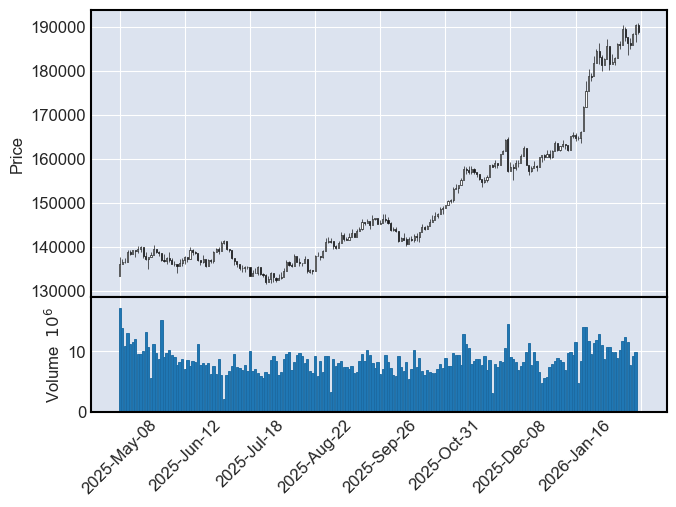

In [5]:
mpf.plot(df_mpf.tail(200), type="candle", volume=True)

In [13]:
df_fig = df.tail(50).reset_index(drop=True)

fig = go.Figure(data=[go.Candlestick(
    x=df_fig["Date"],
    open=df_fig["Open"],
    high=df_fig["High"],
    low=df_fig["Low"],
    close=df_fig["Adj Close"],
)])

#fig.show(renderer="browser")
fig.show()

# 2) Silver

In [ ]:
df_silver = pd.read_parquet(r"D:\Documentos\Data & AI\volatility-regime-lab\data\silver\ibov_returns.parquet")

In [ ]:
df_silver

,Date,Adj Close,Close,High,Low,Open,Volume,ret,log_ret
0,1993-04-28,24.299999,24.299999,24.600000,23.700001,24.500000,0,-0.008163,-0.008197
1,1993-04-29,23.700001,23.700001,24.799999,23.700001,24.299999,0,-0.024691,-0.025001
2,1993-04-30,24.100000,24.100000,24.200001,23.700001,23.700001,0,0.016878,0.016737
3,1993-05-03,24.100000,24.100000,24.400000,23.799999,24.100000,0,0.000000,0.000000
4,1993-05-04,24.900000,24.900000,25.000000,24.100000,24.100000,0,0.033195,0.032656
...,...,...,...,...,...,...,...,...,...
8123,2026-02-13,186464.000000,186464.000000,187766.000000,183662.000000,187766.000000,11594000,-0.006934,-0.006958
8124,2026-02-18,186016.000000,186016.000000,187657.000000,185001.000000,186464.000000,7790700,-0.002403,-0.002405
8125,2026-02-19,188534.000000,188534.000000,188687.000000,185928.000000,186020.000000,9228700,0.013536,0.013446
8126,2026-02-20,190534.000000,190534.000000,190727.000000,186700.000000,188531.000000,9988100,0.010608,0.010552


# 3) Gold

In [ ]:
df_gold = pd.read_parquet(r"D:\Documentos\Data & AI\volatility-regime-lab\data\gold\ibov_features.parquet")

In [ ]:
df_gold

,Date,ret,log_ret,vol_20,vol_60,ret_20,ret_60,drawdown,max_dd_60
0,1993-07-21,0.000000,0.000000,0.026445,0.027620,0.295218,1.542857,0.000000,-0.054636
1,1993-07-22,-0.009631,-0.009677,0.026925,0.027642,0.266940,1.539095,-0.009631,-0.054636
2,1993-07-23,0.029173,0.028756,0.023690,0.027173,0.216475,1.679325,0.000000,-0.054636
3,1993-07-26,-0.026772,-0.027137,0.024715,0.027749,0.152985,1.564315,-0.026772,-0.054636
4,1993-07-27,0.004854,0.004843,0.024262,0.027710,0.173913,1.576763,-0.022047,-0.054636
...,...,...,...,...,...,...,...,...,...
8064,2026-02-13,-0.006934,-0.006958,0.013732,0.012227,0.131456,0.182105,-0.017053,-0.043349
8065,2026-02-18,-0.002403,-0.002405,0.013806,0.012207,0.128402,0.184868,-0.019415,-0.043349
8066,2026-02-19,0.013536,0.013446,0.013895,0.012258,0.133855,0.204521,-0.006141,-0.043349
8067,2026-02-20,0.010608,0.010552,0.012482,0.012218,0.108936,0.226237,0.000000,-0.043349


In [ ]:
df_gold.columns

Index(['Date', 'ret', 'log_ret', 'vol_20', 'vol_60', 'ret_20', 'ret_60',
       'drawdown', 'max_dd_60'],
      dtype='object')

# 4) Output ML

In [ ]:
df_ml = pd.read_parquet(r"D:\Documentos\Data & AI\volatility-regime-lab\data\gold\ibov_regimes.parquet")

In [ ]:
df_ml

,Date,vol_20,vol_60,cluster_id,regime
0,1993-07-21,0.026445,0.027620,2,1
1,1993-07-22,0.026925,0.027642,2,1
2,1993-07-23,0.023690,0.027173,2,1
3,1993-07-26,0.024715,0.027749,2,1
4,1993-07-27,0.024262,0.027710,2,1
...,...,...,...,...,...
8064,2026-02-13,0.013732,0.012227,0,0
8065,2026-02-18,0.013806,0.012207,0,0
8066,2026-02-19,0.013895,0.012258,0,0
8067,2026-02-20,0.012482,0.012218,0,0


# 5) Scoring

In [9]:
df_score = pd.read_parquet(r"D:\Documentos\Data & AI\volatility-regime-lab\data\gold\ibov_scored.parquet")

In [10]:
df_score

,Date,Adj Close,Close,High,Low,Open,Volume,ret_x,log_ret_x,cluster_id,regime,ret_y,log_ret_y,vol_20,vol_60,ret_20,ret_60,drawdown,max_dd_60
0,1993-07-21,62.299999,62.299999,63.200001,62.200001,62.299999,0,0.000000,0.000000,2,1,0.000000,0.000000,0.026445,0.027620,0.295218,1.542857,0.000000,-0.054636
1,1993-07-22,61.700001,61.700001,62.299999,60.599998,62.299999,0,-0.009631,-0.009677,2,1,-0.009631,-0.009677,0.026925,0.027642,0.266940,1.539095,-0.009631,-0.054636
2,1993-07-23,63.500000,63.500000,64.300003,61.700001,61.700001,0,0.029173,0.028756,2,1,0.029173,0.028756,0.023690,0.027173,0.216475,1.679325,0.000000,-0.054636
3,1993-07-26,61.799999,61.799999,63.700001,61.500000,63.500000,0,-0.026772,-0.027137,2,1,-0.026772,-0.027137,0.024715,0.027749,0.152985,1.564315,-0.026772,-0.054636
4,1993-07-27,62.099998,62.099998,62.299999,61.099998,61.799999,0,0.004854,0.004843,2,1,0.004854,0.004843,0.024262,0.027710,0.173913,1.576763,-0.022047,-0.054636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,2026-02-13,186464.000000,186464.000000,187766.000000,183662.000000,187766.000000,11594000,-0.006934,-0.006958,0,0,-0.006934,-0.006958,0.013732,0.012227,0.131456,0.182105,-0.017053,-0.043349
8065,2026-02-18,186016.000000,186016.000000,187657.000000,185001.000000,186464.000000,7790700,-0.002403,-0.002405,0,0,-0.002403,-0.002405,0.013806,0.012207,0.128402,0.184868,-0.019415,-0.043349
8066,2026-02-19,188534.000000,188534.000000,188687.000000,185928.000000,186020.000000,9228700,0.013536,0.013446,0,0,0.013536,0.013446,0.013895,0.012258,0.133855,0.204521,-0.006141,-0.043349
8067,2026-02-20,190534.000000,190534.000000,190727.000000,186700.000000,188531.000000,9988100,0.010608,0.010552,0,0,0.010608,0.010552,0.012482,0.012218,0.108936,0.226237,0.000000,-0.043349
